In [7]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [8]:
import csv 
import pandas as pd

# convert to array
with open('../E-Jeep Data/Ejeep Sept 18.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# get track data and remove waypoints
for i,row in enumerate(data):
    if(len(row) > 0 and row[0] == 'Track'):
        data = data[i+1:]
        break

# remove header
header = data[0]
data = data[1:]

# convert to float and breakdown time data
for i in range(len(data)):
    data[i][3] = float(data[i][3])
    data[i][4] = float(data[i][4])
    
    # print(data[i]+data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split())
    
    # hack to get individual time data
    timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    data[i] += timelog

header += ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond']   

# convert to dataframe
df = pd.DataFrame(data, columns=header)
df

header

['Date(GMT)',
 'Date(Local)',
 'Time(sec)',
 'Latitude',
 'Longitude',
 'Horizontal Accuracy(m)',
 'Altitude(m)',
 'Vertical Accuracy(m)',
 'Distance(m)',
 'Speed(m/s)',
 'Average Speed(m/s)',
 'Course(deg)',
 'True Heading(deg)',
 'Magnetic Heading(deg)',
 'Heading Accuracy(deg)',
 'Glide Ratio',
 'Heart Rate (bpm)',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second',
 'Millisecond']

<Axes: xlabel='Minute', ylabel='Latitude'>

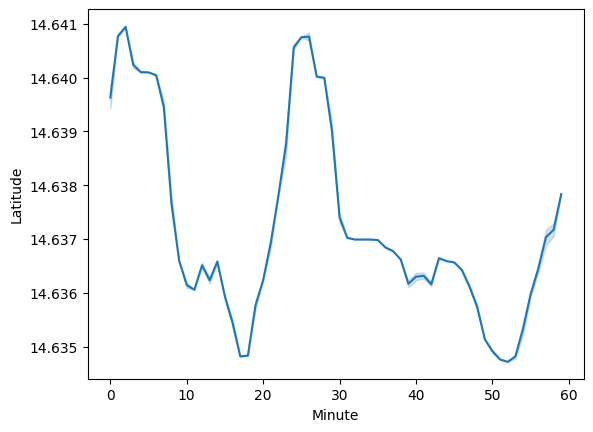

In [9]:
# plot data and time
sns.lineplot(x='Minute', y='Latitude', data=df)

<Axes: xlabel='Minute', ylabel='Longitude'>

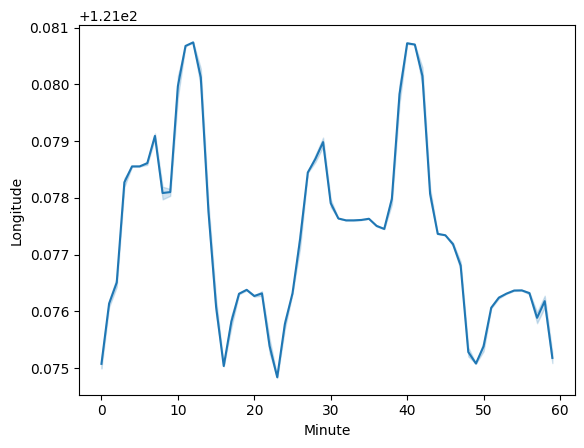

In [10]:
sns.lineplot(x='Minute', y='Longitude', data=df)

In [11]:
X = df[:-1][['Latitude', 'Longitude']]#, 'Minute', 'Second']]#, 'Altitude(m)','Speed(m/s)', 'True Heading(deg)']]
Y = df[1:][['Latitude', 'Longitude']]
Y

,Latitude,Longitude
1,14.634736,121.076293
2,14.634737,121.076293
3,14.634726,121.076292
4,14.634731,121.076293
5,14.634732,121.076295
...,...,...
3922,14.637880,121.074936
3923,14.637880,121.074938
3924,14.637883,121.074939
3925,14.637889,121.074935


In [12]:
X

,Latitude,Longitude
0,14.634736,121.076293
1,14.634736,121.076293
2,14.634737,121.076293
3,14.634726,121.076292
4,14.634731,121.076293
...,...,...
3921,14.637876,121.074936
3922,14.637880,121.074936
3923,14.637880,121.074938
3924,14.637883,121.074939


In [13]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X, Y)

LinearRegression()

In [14]:
# new df for output, copy of X
df_output = X.copy()
# df_output = pd.DataFrame(columns = ['Latitude', 'Longitude'])
row = X.iloc[-1]
for i in range(10000):
    yhat = model_lr.predict(row.to_frame().transpose())
    print(yhat)
    next_row = [yhat[0][0], yhat[0][1]]
    # if next_row[3] >= 60:
    #     next_row[3] -= 60
    #     next_row[2] += 1
    # if next_row[2] >= 60:
    #     next_row[2] -= 60
    df_output.loc[len(df_output)] = next_row
    row = df_output.iloc[-1]
    
df_output

[[ 14.637896  121.0749361]]
[[ 14.637903   121.07493722]]
[[ 14.63790999 121.07493835]]
[[ 14.63791699 121.07493949]]
[[ 14.63792398 121.07494064]]
[[ 14.63793096 121.07494181]]
[[ 14.63793795 121.07494298]]
[[ 14.63794493 121.07494417]]


[[ 14.6379519  121.07494537]]
[[ 14.63795888 121.07494659]]
[[ 14.63796585 121.07494781]]
[[ 14.63797281 121.07494905]]
[[ 14.63797978 121.07495029]]
[[ 14.63798674 121.07495155]]
[[ 14.6379937  121.07495283]]
[[ 14.63800065 121.07495411]]
[[ 14.6380076  121.07495541]]
[[ 14.63801455 121.07495671]]
[[ 14.63802149 121.07495803]]
[[ 14.63802843 121.07495937]]
[[ 14.63803537 121.07496071]]
[[ 14.6380423  121.07496207]]
[[ 14.63804923 121.07496343]]
[[ 14.63805616 121.07496481]]
[[ 14.63806308 121.0749662 ]]
[[ 14.63807    121.07496761]]
[[ 14.63807692 121.07496902]]
[[ 14.63808383 121.07497045]]
[[ 14.63809074 121.07497189]]
[[ 14.63809764 121.07497334]]
[[ 14.63810454 121.0749748 ]]
[[ 14.63811144 121.07497627]]
[[ 14.63811833 121.07497776]]
[[ 14.63812522 121.07497926]]
[[ 14.63813211 121.07498077]]
[[ 14.63813899 121.07498229]]
[[ 14.63814586 121.07498382]]
[[ 14.63815274 121.07498537]]
[[ 14.6381596  121.07498692]]
[[ 14.63816647 121.07498849]]
[[ 14.63817333 121.07499007]]
[[ 14.6381

,Latitude,Longitude
0,14.634736,121.076293
1,14.634736,121.076293
2,14.634737,121.076293
3,14.634726,121.076292
4,14.634731,121.076293
...,...,...
13921,14.638477,121.079446
13922,14.638472,121.079447
13923,14.638467,121.079449
13924,14.638462,121.079451


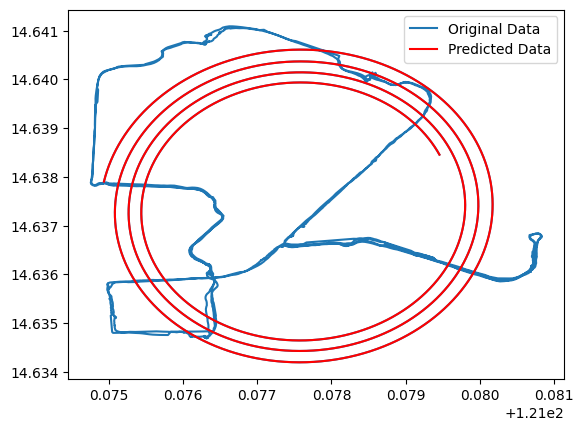

In [15]:
# plot
plt.plot(df_output['Longitude'], df_output['Latitude'], label='Original Data')

#different color for after original data
plt.plot(df_output['Longitude'][len(df):], df_output['Latitude'][len(df):], color='red', label='Predicted Data')

plt.legend()
plt.show()

In [16]:
for i in df_output['Latitude']:
    print(type(i), i)
    break

<class 'float'> 14.634736


In [17]:
df_output['Longitude']

0        121.076293
1        121.076293
2        121.076293
3        121.076292
4        121.076293
            ...    
13921    121.079446
13922    121.079447
13923    121.079449
13924    121.079451
13925    121.079453
Name: Longitude, Length: 13926, dtype: float64

# Evaluation Metric

The following Evaluation Metrics will be used:
* Root Mean Squared Error (RMSE)
* Adjusted R^2 Score
* Mean Absolute Error (MAE)

In [18]:
from sklearn.metrics import mean_squared_error

long_rmse = mean_squared_error(df_output['Longitude'], df_output['Longitude'][len(df):], squared=False)
lat_rmse = mean_squared_error(df_output['Latitude'], df_output['Latitude'][len(df):], squared=False)

long_rmse
lat_rmse

ValueError: Found input variables with inconsistent numbers of samples: [13926, 9999]

In [ ]:
from sklearn.metrics import r2_score
  
long_r2 = 1-(1-r2_score(df_output['Longitude'], df_output['Longitude'][len(df):]))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))